In [19]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Пути к данным
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
input_file = os.path.join(BASE_DIR, "data/processed/train_full_stats_dataset.csv")


In [20]:
# Загружаем датасет
df = pd.read_csv(input_file, parse_dates=['Date'], dayfirst=True)

# Очистка NaN и Inf
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna().reset_index(drop=True)

print("Размер датасета после очистки:", df.shape)


Размер датасета после очистки: (5742, 48)


/var/folders/fv/fkgvl7hn62s6x3tj0f869w680000gn/T/ipykernel_1393/617824003.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(input_file, parse_dates=['Date'], dayfirst=True)


In [21]:
# Признаки
feature_cols = [col for col in df.columns if col.startswith(('Home_', 'Away_', 'H2H_'))]

# Таргеты
target_cols = [
    "Target_FTHG", "Target_FTAG",
    "Target_HS", "Target_AS", "Target_HST", "Target_AST",
    "Target_HF", "Target_AF", "Target_HC", "Target_AC",
    "Target_HY", "Target_AY", "Target_HR", "Target_AR"
]

X = df[feature_cols]
y = df[target_cols]

print("Признаки:", X.shape)
print("Таргеты:", y.shape)


Признаки: (5742, 30)
Таргеты: (5742, 14)


In [22]:
results = {}
models = {}

for target in target_cols:
    print(f"Обучаем модель для: {target}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y[target], test_size=0.2, random_state=42)
    
    model = XGBRegressor(
        n_estimators=400,
        learning_rate=0.1,
        max_depth=10,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE для {target}: {mae:.2f}")
    
    results[target] = (y_test.reset_index(drop=True), pd.Series(y_pred))
    models[target] = model


Обучаем модель для: Target_FTHG
MAE для Target_FTHG: 1.05
Обучаем модель для: Target_FTAG
MAE для Target_FTAG: 0.95
Обучаем модель для: Target_HS
MAE для Target_HS: 4.28
Обучаем модель для: Target_AS
MAE для Target_AS: 3.98
Обучаем модель для: Target_HST
MAE для Target_HST: 2.15
Обучаем модель для: Target_AST
MAE для Target_AST: 1.89
Обучаем модель для: Target_HF
MAE для Target_HF: 3.04
Обучаем модель для: Target_AF
MAE для Target_AF: 3.06
Обучаем модель для: Target_HC
MAE для Target_HC: 2.43
Обучаем модель для: Target_AC
MAE для Target_AC: 2.20
Обучаем модель для: Target_HY
MAE для Target_HY: 1.12
Обучаем модель для: Target_AY
MAE для Target_AY: 1.16
Обучаем модель для: Target_HR
MAE для Target_HR: 0.17
Обучаем модель для: Target_AR
MAE для Target_AR: 0.18


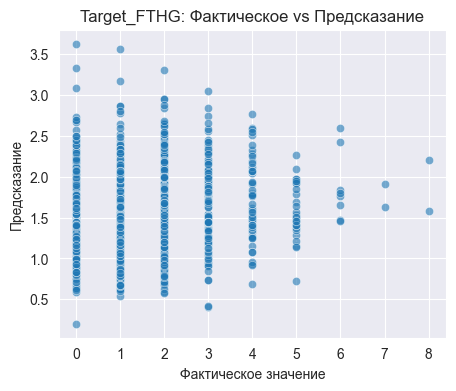

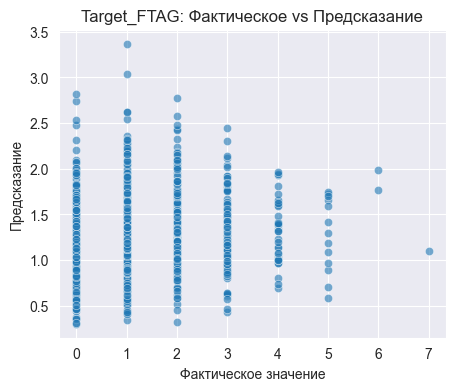

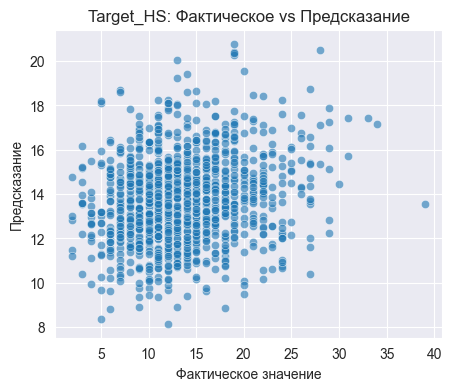

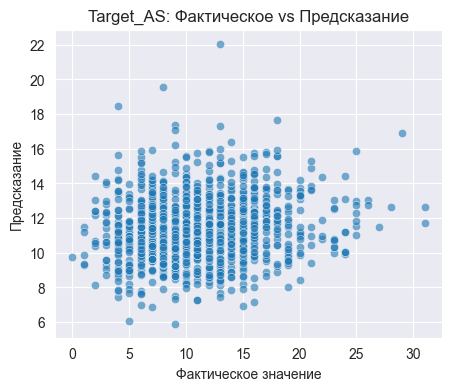

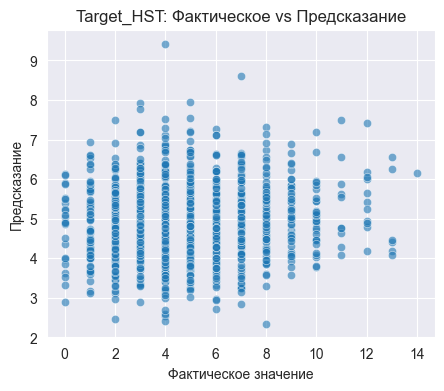

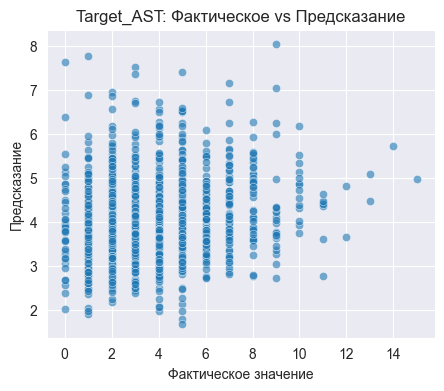

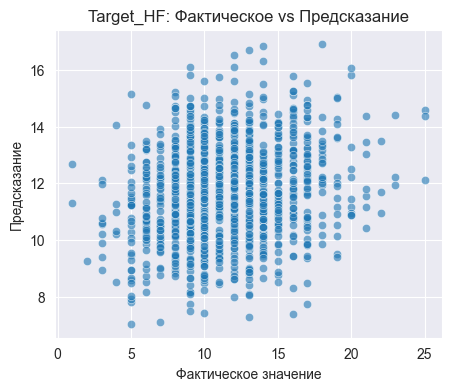

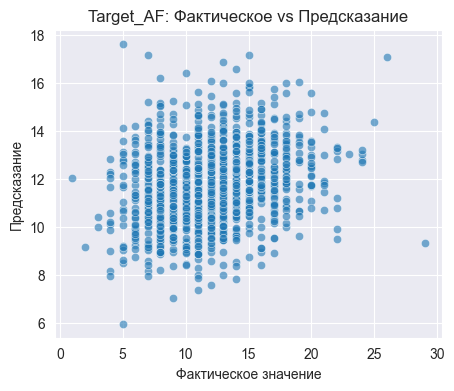

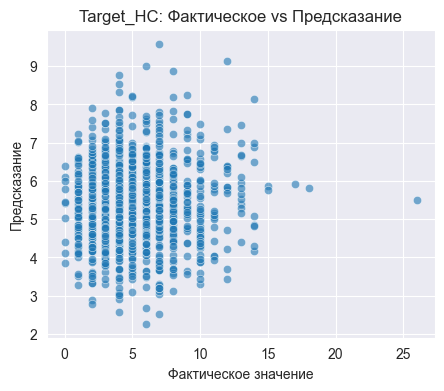

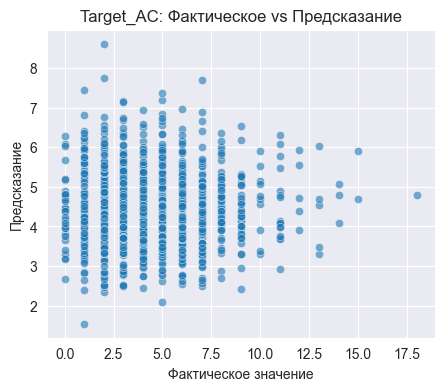

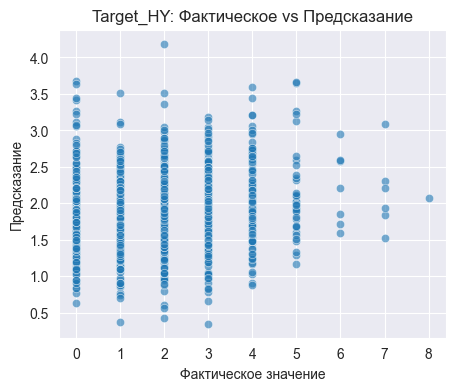

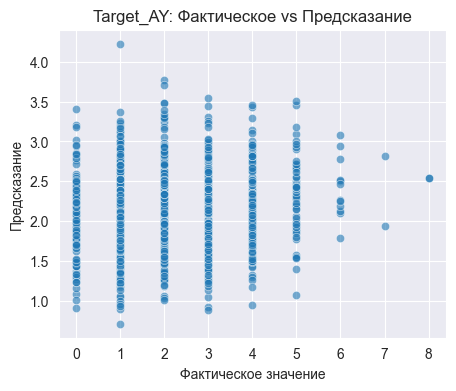

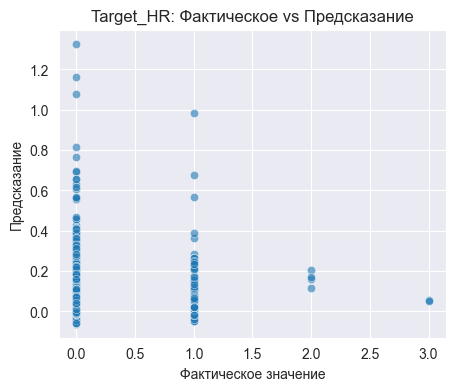

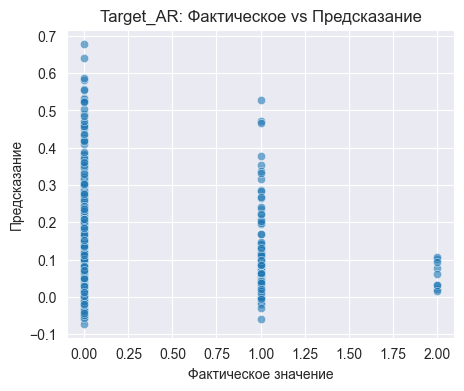

In [23]:
for target, (y_test, y_pred) in results.items():
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("Фактическое значение")
    plt.ylabel("Предсказание")
    plt.title(f"{target}: Фактическое vs Предсказание")
    plt.show()


In [24]:
example_rows = pd.DataFrame()

for target, (y_test, y_pred) in results.items():
    temp = pd.DataFrame({
        'Target': target,
        'y_true': y_test,
        'y_pred': y_pred
    })
    temp = temp.head(5)  # берем 5 матчей
    example_rows = pd.concat([example_rows, temp], axis=0)

example_rows.reset_index(drop=True, inplace=True)
example_rows


,Target,y_true,y_pred
0,Target_FTHG,2.0,1.391695
1,Target_FTHG,6.0,2.595066
2,Target_FTHG,5.0,1.483746
3,Target_FTHG,1.0,1.997048
4,Target_FTHG,2.0,1.670266
...,...,...,...
65,Target_AR,0.0,0.015561
66,Target_AR,0.0,0.351550
67,Target_AR,0.0,0.062525
68,Target_AR,0.0,0.270563
